In [ ]:
# References

[DataCamp fuzzy-string tutorial](https://www.datacamp.com/tutorial/fuzzy-string-python)   
[Text Similarity](https://livebook.manning.com/book/data-science-bookcamp/chapter-13/95)
[Ultimate guide to text similarity](https://newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python)
       

In [ ]:
# Tags 
NLP, Levenstein distance, fuzzy matching, Jaccard Similarity, Tanimato Similarity ,Cosine Similarity

Differences between Jaccard Similarity and Cosine Similarity:

1. Jaccard similarity takes only unique set of words for each sentence / document while cosine similarity takes total length of the vectors. (these vectors could be made from bag of words term frequency or tf-idf)

2. This means that if you repeat the word “friend” in Sentence 1 several times, cosine similarity changes but Jaccard similarity does not. For ex, if the word “friend” is repeated in the first sentence 50 times, cosine similarity drops to 0.4 but Jaccard similarity remains at 0.5.

3. Jaccard similarity is good for cases where duplication does not matter, cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.

In [1]:
# imports
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# getting help

# help(plt.hist)
# help(plt.legend)

In [2]:
# settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Levenshtein Distance

In [ ]:
# Summary

The Levenshtein Distance
The Levenshtein distance is a metric to measure how apart are two sequences of words. 
In other words, it measures the minimum number of edits that you need to do to change a one-word sequence into the other. 
These edits can be insertions, deletions or substitutions.


In [1]:
# From scratch

import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [4]:
# quick check

Str1 = "Apple Inc."
Str2 = "apple Inc"

result = Str1.lower() == Str2.lower()
print(result)

False


In [2]:
# Calculate levenshtein distance
Str1 = "Apple Inc."
Str2 = "apple Inc"
Distance = levenshtein_ratio_and_distance(Str1,Str2)
print(Distance)
Ratio = levenshtein_ratio_and_distance(Str1,Str2,ratio_calc = True)
print(Ratio)

The strings are 2 edits away
0.8421052631578947


# Fuzzy string comparison - fuzzywuzzy

In [6]:
# apply fuzzywuzzy package

from fuzzywuzzy import fuzz
Str1 = "Apple Inc."
Str2 = "apple Inc"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
print(Ratio)

95


In [7]:
# Partial ratio - substrings

Str1 = "Los Angeles Lakers"
Str2 = "Lakers"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
print(Ratio)
print(Partial_Ratio)

50
100


In [8]:
# Token sort ratio - different order of substrings
Str1 = "united states v. nixon"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)

59
74
100


In [ ]:
# Token set ratio - very different lenghts
Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)

In [9]:
#  process - allows to calculate the string with the highest similarity out of a vector of strings

from fuzzywuzzy import process
str2Match = "apple inc"
strOptions = ["Apple Inc.","apple park","apple incorporated","iphone"]
Ratios = process.extract(str2Match,strOptions)
print(Ratios)
# You can also select the string with the highest matching percentage
highest = process.extractOne(str2Match,strOptions)
print(highest)

[('Apple Inc.', 100), ('apple incorporated', 90), ('apple park', 67), ('iphone', 30)]
('Apple Inc.', 100)


# Jackard similarity

In [16]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

In [15]:
# Splitting texts into words
words_lists = [text.split() for text in [text1, text2, text3]]

words1, words2, words3 = words_lists
 
for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [17]:
# Removing case sensitivity and punctuation

def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
 
    return text.lower()
 
for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
 
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



In [20]:
# Converting word lists to sets

words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")



Unique Words in text 1
{'sells', 'by', 'she', 'seashells', 'the', 'seashore'}

Unique Words in text 2
{'by', 'seashells', 'sale', 'are', 'on', 'the', 'seashore'}

Unique Words in text 3
{'john', 'sells', 'by', 'the', 'she', 'lake', 'to', '3', 'who', 'lives', 'seashells'}



In [32]:
# Extracting overlapping words between two texts

words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'by', 'the', 'seashells', 'seashore'}

Texts 1 and 3 share these 5 words:
{'sells', 'by', 'she', 'seashells', 'the'}



In [33]:
# Extracting diverging words between two texts

for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")
    

Texts 1 and 2 don't share these 5 words:
{'she', 'sells', 'sale', 'are', 'on'}

Texts 1 and 3 don't share these 7 words:
{'john', 'lake', 'to', '3', 'who', 'lives', 'seashore'}



In [34]:
# Extracting the union of words between two texts
    
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 unique words. These words are:
 {'by', 'sells', 'she', 'seashells', 'sale', 'are', 'on', 'the', 'seashore'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'john', 'by', 'she', 'to', '3', 'seashells', 'seashore', 'lake', 'sells', 'who', 'lives', 'the'}



In [35]:
# Extracting the percentage of shared words between two texts

for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
 
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. \n{percent_shared:.2f}% of these words are "
          f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



Texts 1 and 3 share 41.67% of total words. The remaining 58.33% of words diverge. Meanwhile, texts 1 and 2 share 44.44% of total words. That percentage is higher, and thus we can infer that text1 is more similar to text2 than to text3.

We’ve essentially developed a simple metric for assessing similarities between texts. The metric works as follows:

Given two texts, extract a list of words from each text.
Count the unique words that are shared between the texts.
Divide the shared word count by the total unique words across both texts. Our output is a fraction of the total words shared between texts.
This similarity metric is referred to as the Jaccard similarity, or the Jaccard index.

The Jaccard similarity between texts 1 and 2 is illustrated in figure 13.2, where the texts are represented as two circles. The left circle corresponds to text 1, and the right circle corresponds to text 2. Each circle contains the words in its corresponding text. The two circles intersect, and their intersection contains all words that are shared between the texts. The Jaccard similarity equals the fraction of total words that are present in the intersection. Four of the nine words in the diagram appear in the intersection. Therefore, the Jaccard similarity is equal to 4 / 9.

Figure 13.2 A visualized representation of the Jaccard similarity between two texts


In [36]:
# Computing the Jaccard similarity

def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total
 
for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
          f"equals {similarity:.4f}." "\n")


The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [37]:
# Efficiently computing the Jaccard similarity

def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total
 
for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

# Tanimato similarity

In [31]:
#  Assigning words to numbers in a vocabulary
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3    
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"Our vocabulary contains {len(vocabulary)} words. "
      f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'john': 0, 'by': 1, 'she': 2, 'lives': 3, 'to': 4, '3': 5, 'seashells': 6, 'seashore': 7, 'lake': 8, 'sells': 9, 'sale': 10, 'are': 11, 'who': 12, 'on': 13, 'the': 14}


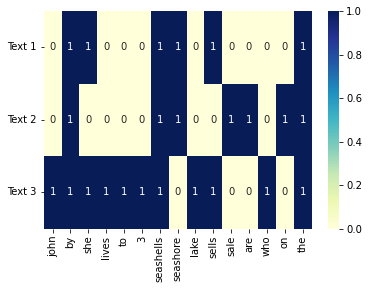

In [38]:
# Transforming words into binary vectors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)
 
sns.heatmap(vectors, annot=True,  cmap='YlGnBu',
            xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [39]:
# Finding shared words using vector arithmetic
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'by' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2
'the' is present in both texts 1 and 2


In [40]:
# Counting shared words using vector arithmetic

shared_word_count = sum(vector1[i] * vector2[i]
                        for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

In [42]:
# Computing a vector dot product using NumPy
shared_word_count = sum(vector1[i] * vector2[i]
                        for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

In [45]:
# Counting total words using vector arithmetic
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

In [44]:
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

Tanimato similarity     
We are able to compute both shared word count and total unique word count using vector dot products. Essentially, we can compute the Jaccard similarity using only vector operations.
This vectorized implementation of Jaccard is called the Tanimoto similarity.

In [47]:
# Computing text similarity using vector arithmetic
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total
 
for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)